<a href="https://colab.research.google.com/github/Abhijitmukherjee36/AI-celeb-face-recogniser/blob/main/face_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os


In [5]:
# Define the path to your dataset
dataset_path = "/content/drive/MyDrive/Dataset/Celebrity Faces Dataset"

# Preprocessing images (resizing, rescaling)
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

# Load train and validation data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1440 images belonging to 17 classes.
Found 360 images belonging to 17 classes.


In [6]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(128, 128, 3)),  # Define input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
   # Dense(1024, activation='relu'),
    Dense(len(train_data.class_indices), activation='softmax')  # Number of celebrities
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
print (model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 17)                  │         156,689 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,105 (2.08 MB)

 Trainable params: 545,105 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
print(train_data.class_indices)

{'Angelina Jolie': 0, 'Brad Pitt': 1, 'Denzel Washington': 2, 'Hugh Jackman': 3, 'Jennifer Lawrence': 4, 'Johnny Depp': 5, 'Kate Winslet': 6, 'Leonardo DiCaprio': 7, 'Megan Fox': 8, 'Natalie Portman': 9, 'Nicole Kidman': 10, 'Robert Downey Jr': 11, 'Sandra Bullock': 12, 'Scarlett Johansson': 13, 'Tom Cruise': 14, 'Tom Hanks': 15, 'Will Smith': 16}


In [9]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # Start with 5 epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 929s 18s/step - accuracy: 0.1024 - loss: 2.8297 - val_accuracy: 0.1111 - val_loss: 2.7634
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.1563 - loss: 2.6857 - val_accuracy: 0.2194 - val_loss: 2.3558
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.2210 - loss: 2.3449 - val_accuracy: 0.2722 - val_loss: 2.2120
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.3006 - loss: 2.1051 - val_accuracy: 0.3167 - val_loss: 2.1204
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.4295 - loss: 1.7864 - val_accuracy: 0.3139 - val_loss: 2.0366
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.5248 - loss: 1.4584 - val_accuracy: 0.3778 - val_loss: 2.0016
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.6606 - loss: 1.0895 - val_accuracy: 0.3833 - val_loss: 2.1647
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.7677 - loss: 0.7108 - val_accuracy: 0.4167 - val_loss: 2.3532


Saving megan.jpeg to megan.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


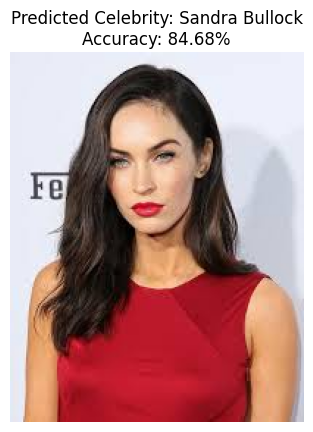

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
# Upload the image
uploaded = files.upload()

for fn in uploaded.keys():
    # Load the image
    img = cv2.imread(fn)

    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the input shape of the model
    img_resized = cv2.resize(img_rgb, (128, 128))

    # Prepare the image for prediction
    img_resized = img_resized / 255  # Rescale
    img_resized = np.expand_dims(img_resized, axis=0)  # Add batch dimension

    # Predict the celebrity
    pred = model.predict(img_resized)
    predicted_class = np.argmax(pred)

    # Calculate predicted accuracy
    predicted_accuracy = np.max(pred)*100  # Get the maximum probability

    # Get the class labels from the training data
    class_labels = list(train_data.class_indices.keys())

    # Display the image with accuracy
    plt.imshow(img_rgb)
    plt.title(f"Predicted Celebrity: {class_labels[predicted_class]}\nAccuracy: {predicted_accuracy:.2f}%")
    plt.axis('off')  # Hide axes
    plt.show()